## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0   9.922167  169.618898  0.471146  5.115979   80.585505
1  15.986365  350.022961  0.614207  4.543682  215.710164
2  48.830596  558.120426  0.542201  6.764853  306.457783
3  32.004641  741.690685  0.273491  6.388583  205.310864
4  33.450630  295.660439  0.110934  6.586098   46.774695


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0529245	total: 57.6ms	remaining: 57.5s
1:	learn: 1.0408832	total: 58.1ms	remaining: 29s
2:	learn: 1.0287232	total: 58.6ms	remaining: 19.5s
3:	learn: 1.0189154	total: 59ms	remaining: 14.7s
4:	learn: 1.0057503	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9972787	total: 60.1ms	remaining: 9.95s
6:	learn: 0.9818488	total: 60.6ms	remaining: 8.59s
7:	learn: 0.9696065	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9607293	total: 61.6ms	remaining: 6.78s
9:	learn: 0.9466717	total: 62ms	remaining: 6.13s
10:	learn: 0.9330304	total: 62.5ms	remaining: 5.61s
11:	learn: 0.9219706	total: 63ms	remaining: 5.18s
12:	learn: 0.9102126	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8978123	total: 64.1ms	remaining: 4.51s
14:	learn: 0.8874008	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8765435	total: 65ms	remaining: 4s
16:	learn: 0.8659820	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8546187	total: 66ms	remaining: 3.6s
18:	learn: 0.8456500	total: 66.3ms	remaining: 3.42s
19:	lear

99:	learn: 0.3309443	total: 102ms	remaining: 919ms
100:	learn: 0.3279026	total: 103ms	remaining: 914ms
101:	learn: 0.3249939	total: 103ms	remaining: 907ms
102:	learn: 0.3209797	total: 103ms	remaining: 901ms
103:	learn: 0.3185883	total: 104ms	remaining: 895ms
104:	learn: 0.3143705	total: 104ms	remaining: 888ms
105:	learn: 0.3112553	total: 104ms	remaining: 881ms
106:	learn: 0.3078493	total: 105ms	remaining: 875ms
107:	learn: 0.3044239	total: 106ms	remaining: 875ms
108:	learn: 0.3014692	total: 106ms	remaining: 870ms
109:	learn: 0.2980761	total: 107ms	remaining: 863ms
110:	learn: 0.2947513	total: 107ms	remaining: 857ms
111:	learn: 0.2918440	total: 107ms	remaining: 851ms
112:	learn: 0.2901034	total: 108ms	remaining: 846ms
113:	learn: 0.2867297	total: 108ms	remaining: 840ms
114:	learn: 0.2831448	total: 109ms	remaining: 837ms
115:	learn: 0.2801547	total: 109ms	remaining: 832ms
116:	learn: 0.2774094	total: 110ms	remaining: 828ms
117:	learn: 0.2745906	total: 110ms	remaining: 823ms
118:	learn: 0

290:	learn: 0.0790310	total: 186ms	remaining: 453ms
291:	learn: 0.0788540	total: 186ms	remaining: 452ms
292:	learn: 0.0781872	total: 187ms	remaining: 451ms
293:	learn: 0.0779597	total: 187ms	remaining: 450ms
294:	learn: 0.0777709	total: 188ms	remaining: 449ms
295:	learn: 0.0773666	total: 188ms	remaining: 448ms
296:	learn: 0.0771492	total: 189ms	remaining: 447ms
297:	learn: 0.0769405	total: 189ms	remaining: 446ms
298:	learn: 0.0767249	total: 190ms	remaining: 445ms
299:	learn: 0.0762264	total: 190ms	remaining: 444ms
300:	learn: 0.0760191	total: 191ms	remaining: 443ms
301:	learn: 0.0755063	total: 191ms	remaining: 442ms
302:	learn: 0.0753149	total: 192ms	remaining: 441ms
303:	learn: 0.0751110	total: 192ms	remaining: 440ms
304:	learn: 0.0746331	total: 193ms	remaining: 439ms
305:	learn: 0.0744617	total: 193ms	remaining: 438ms
306:	learn: 0.0741539	total: 194ms	remaining: 437ms
307:	learn: 0.0735405	total: 194ms	remaining: 436ms
308:	learn: 0.0729660	total: 195ms	remaining: 435ms
309:	learn: 

507:	learn: 0.0356880	total: 283ms	remaining: 274ms
508:	learn: 0.0354791	total: 283ms	remaining: 273ms
509:	learn: 0.0354420	total: 284ms	remaining: 273ms
510:	learn: 0.0352370	total: 284ms	remaining: 272ms
511:	learn: 0.0351723	total: 285ms	remaining: 271ms
512:	learn: 0.0349969	total: 285ms	remaining: 271ms
513:	learn: 0.0349611	total: 285ms	remaining: 270ms
514:	learn: 0.0347875	total: 286ms	remaining: 269ms
515:	learn: 0.0346239	total: 286ms	remaining: 269ms
516:	learn: 0.0344628	total: 287ms	remaining: 268ms
517:	learn: 0.0342944	total: 287ms	remaining: 267ms
518:	learn: 0.0341364	total: 288ms	remaining: 267ms
519:	learn: 0.0339724	total: 288ms	remaining: 266ms
520:	learn: 0.0338173	total: 289ms	remaining: 265ms
521:	learn: 0.0336646	total: 289ms	remaining: 265ms
522:	learn: 0.0335760	total: 290ms	remaining: 264ms
523:	learn: 0.0334102	total: 290ms	remaining: 264ms
524:	learn: 0.0332603	total: 291ms	remaining: 263ms
525:	learn: 0.0331000	total: 291ms	remaining: 262ms
526:	learn: 

680:	learn: 0.0175014	total: 367ms	remaining: 172ms
681:	learn: 0.0174667	total: 368ms	remaining: 171ms
682:	learn: 0.0174114	total: 368ms	remaining: 171ms
683:	learn: 0.0173571	total: 368ms	remaining: 170ms
684:	learn: 0.0173037	total: 369ms	remaining: 170ms
685:	learn: 0.0172604	total: 369ms	remaining: 169ms
686:	learn: 0.0172018	total: 370ms	remaining: 168ms
687:	learn: 0.0171592	total: 370ms	remaining: 168ms
688:	learn: 0.0171172	total: 371ms	remaining: 167ms
689:	learn: 0.0170841	total: 371ms	remaining: 167ms
690:	learn: 0.0169667	total: 371ms	remaining: 166ms
691:	learn: 0.0168891	total: 372ms	remaining: 165ms
692:	learn: 0.0168431	total: 372ms	remaining: 165ms
693:	learn: 0.0167668	total: 372ms	remaining: 164ms
694:	learn: 0.0167348	total: 373ms	remaining: 164ms
695:	learn: 0.0166835	total: 373ms	remaining: 163ms
696:	learn: 0.0166331	total: 374ms	remaining: 162ms
697:	learn: 0.0165749	total: 374ms	remaining: 162ms
698:	learn: 0.0164621	total: 374ms	remaining: 161ms
699:	learn: 

904:	learn: 0.0078719	total: 462ms	remaining: 48.5ms
905:	learn: 0.0078575	total: 463ms	remaining: 48ms
906:	learn: 0.0078433	total: 463ms	remaining: 47.5ms
907:	learn: 0.0078177	total: 464ms	remaining: 47ms
908:	learn: 0.0077889	total: 464ms	remaining: 46.5ms
909:	learn: 0.0077749	total: 465ms	remaining: 46ms
910:	learn: 0.0077474	total: 465ms	remaining: 45.4ms
911:	learn: 0.0077216	total: 465ms	remaining: 44.9ms
912:	learn: 0.0076941	total: 466ms	remaining: 44.4ms
913:	learn: 0.0076805	total: 466ms	remaining: 43.9ms
914:	learn: 0.0076670	total: 467ms	remaining: 43.4ms
915:	learn: 0.0076425	total: 467ms	remaining: 42.9ms
916:	learn: 0.0076197	total: 468ms	remaining: 42.3ms
917:	learn: 0.0076010	total: 468ms	remaining: 41.8ms
918:	learn: 0.0075664	total: 469ms	remaining: 41.3ms
919:	learn: 0.0075446	total: 469ms	remaining: 40.8ms
920:	learn: 0.0075159	total: 470ms	remaining: 40.3ms
921:	learn: 0.0074979	total: 470ms	remaining: 39.8ms
922:	learn: 0.0074757	total: 471ms	remaining: 39.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

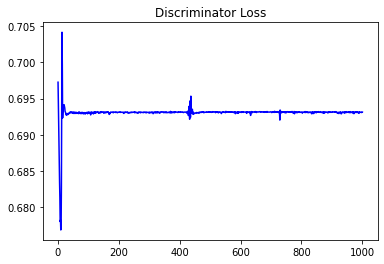

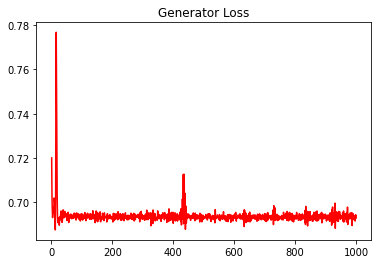

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.022564361627608873


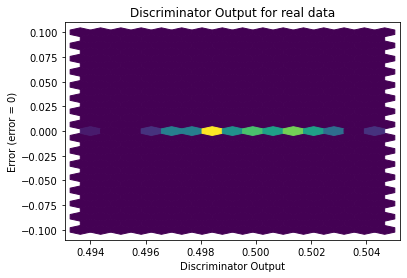

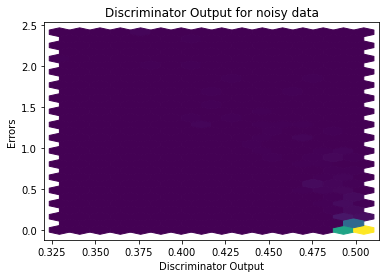

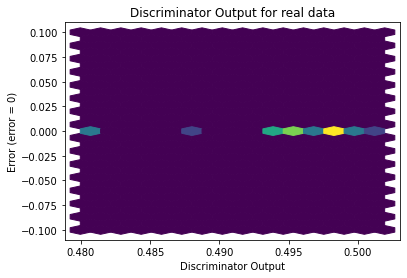

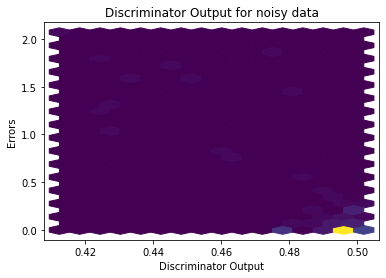

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


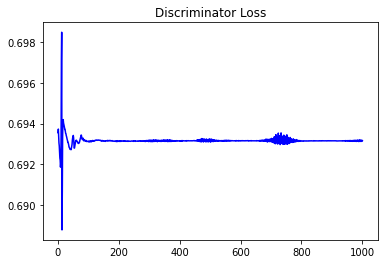

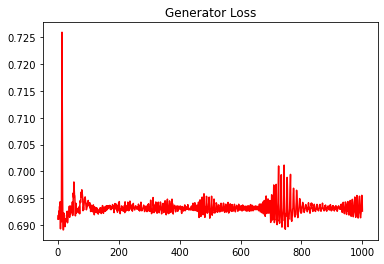

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.036518805801445564


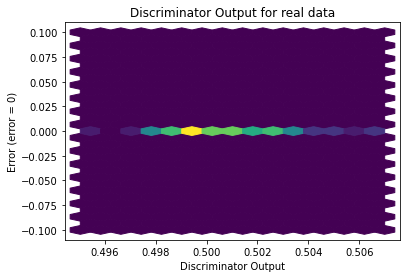

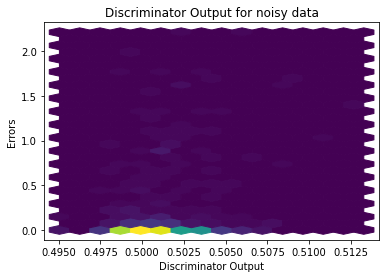

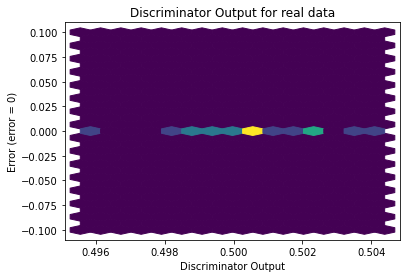

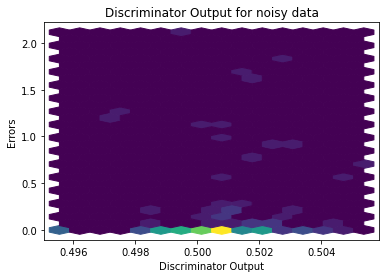

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0308]], requires_grad=True)
